## BMEB W4020: Circuits in the Brain 2020 Fall Homework #1

Author: [Shashwat Shukla](shashwat.shukla@columbia.edu), [Bruce Yi Bu](yb2520@columbia.edu), [Pranav Deevi](pid2104@columbia.edu)

Based on Previous Work by: Yinghao Li, Tingkai Liu, Mehmet Kerem Turkcan, Chung-Heng Yeh, Konstantinos Psychas

Copyright 2023 Shashwat Shukla, Tingkai Liu, Bruce Yi Bu, Pranav Deevi and Aurel A. Lazar

### Names and UNIs

- Lawrence Xu, lzx2002

(Please include the names and UNIs of all team members here; **double click** on **markdown** blocks to edit)

### Before you start...
#### The code skeleton 
* we provide a skeleton of the code for HW1 and all future assignments (excluding the projects)
* you will find helper functions as well as headers of functions that need to be completed (look for "**TO DO**" comments)
* note that you are not required to follow this sequence; the skeleton is just provided for convenience but we highly recommend using it, and you are free to modify it or add custom functions to it.

#### Miscellaneous (attention)
* please remember to include your name in the corresponding field at the start of this notebook, otherwize an automatic 0 grade will be received for all team members
* please post your questions on Ed Discussions, and attend the office hours (every Thursday evening)
* please clearly present your solutions and answers with proper use of plots, markdown and comments
* please start the assignment as soon as possible, submission deadlines are strictly followed and late submissions will receive a 10% penalty for each 24 hours post the deadline
* please email the TA/CAs at least 48hrs ahead of the deadline if you cannot submit an assignment on time (due to exam schedules or overwhelming deadlines, etc), we are flexible as long as we are informed.

## PROBLEM: The Reduced Hodgkin-Huxley Model (Wilson Neuron) 
### Part 1: Solving the Reduced Hodgkin-Huxley Model Numerically
In this problem you are asked to implement (solve) a reduced Hodgkin-Huxley neuron model (**Wilson neuron**) that is a further simplification of the Rinzel model. The Wilson neuron model is described by the differential equations:

\begin{equation}
\begin{split}
C\frac{dV}{dt} &= -g_{Na}\cdot(17.81+47.71V+32.63V^2)\cdot(V-E_{Na}) - g_R\cdot R\cdot(V-E_R) + I(t) \\
\tau_R\frac{dR}{dt} &= -R + 1.35V + 1.03 \\
\end{split}
\end{equation}
where 


    
|$g_{Na}$|$E_{Na}$|$g_R$|$E_R$|$\tau_R$|$C$|
|:----|:-----|:---|:---|:-----|:-----|
|<img style="width:100px">1 $mS/cm^2$ |<img style="width:100px">0.55 $mV$|<img style="width:100px">26 $mS/cm^2 $|<img style="width:100px">-0.92 $mV$|<img style="width:100px">1.9 $ms$|<img style="width:100px">0.8 $\mu F/cm^2$|
    
Create an input current of the form
$$I(t)= \sum^{10}_{k=0}a_k \frac{\sin \Omega (t-kT)}{\Omega (t-kT)}$$
where $a_k = constant (pA), 0 \leq k \leq 10$, $\Omega = 2 \pi \cdot 60$ Hz, $T = \pi/\Omega$,
$t \in [0, 200]$ ms. 

1. Implement the Wilson neuron model defined by the equations above. You are asked to implement [Euler's method](https://en.wikipedia.org/wiki/Euler_method) for solving differential equations numerically. Essentially, for the differential equation $\frac{dx}{dt} = f(x) + I(t)$, we iteratively evaluate the value of $x(t+\Delta t)$ given the previous value $x(t)$ and the gradient of $f(x(t)) + I(t)$ as $\frac{x(t+\Delta t) - x(t)}{\Delta t} = f(x(t)) + I(t)$.

2. Assuming that $a_k=constant, -M \le m \le M$, with initial conditions $V(0)=-0.7mV, R(0)=0.088 (unitless)$, plot the input and the output of the Wilson neuron on the time interval [0, 200] ms, using an $a_k$ such that the neuron robustly spikes. 
    * Make sure to show one plot featuring both input current and membrane voltage. You can use the `.twinx()` function in `matplotlib` (google documentation if you wish) to create two y-axes in one plot.
    * We recommend experimenting with a wide range of $a_k$ values to see its effect on the voltage spikes.
    * Since Wilson model's voltage scale is *100 smaller* than the biophysically accurate range (e.g., $V(0)=-70mV$ would be the biophysical norm), feel free to scale up in your plot the voltage output by 100 times.  
3. Empirically determine a range of values for the $a_k$'s that makes the neuron fire. Plot the total number of spikes fired in the interval [0, 200] ms for a broad range of $a_k = constant$ values. For the same range of input current values, show the following
    1. spike count
    2. spike rate (spikes per second)
    3. spike amplitude (Voltage value at spike time)
4. Assume the input current is $I(t) = c\cdot u(t)$, where $u(t)$ is a [Heaviside step function](https://en.wikipedia.org/wiki/Heaviside_step_function), and $c$ is amplitude of the injected current in $pA$. Find a range of values for $c$ such that the Wilson neuron exhibits periodic spiking (limit cycle). Draw the limit cycle in the $V$ vs. $R$ plane for at least 3 different values of $c$, comment on the effect of the amplitude $c$ on the limit cycle and the membrane voltage based on your results.

In [2]:
# Import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)  # fix random seed

In [3]:
# Define spike detection function
def spike_detect(v, thresh):
    x = (v[2:-1] > v[1:-2]) * (v[2:-1] > v[3:]) * (v[2:-1] > thresh)
    x = np.append(False, x)
    x = np.append(x, False)
    return x


In [4]:
# TODO - define a funciton to generate the input current
# the functions should take the following forms

#def I_in(t,a,K,omega):
#   input: (t,a,K,omega), a is a vector of all ak values
#   output: I

def I_in(t, a, k, omega):
    I = 0
    T = np.pi / omega

    for k in range(11):
        kt = k * T
        I += a * np.sin(omega * (t - kt)) / (omega * (t - kt))
    return I


In [5]:
#Constants
g_Na = 1 #mS/cm^2
E_Na = 0.55 #mV
g_R = 26 #mS/cm^2
E_R = -0.92 #mV
th_R = 1.9 #ms
C = 0.8 #muF / cm^2
k = 10
omega = 2 * np.pi * 60 / 1000

t0 = 0.0000001
t_end = 200
delta_t = 0.01
num_steps = int((t_end - t0) / delta_t)
t_2 = np.linspace(t0, t_end, num_steps + 1)

t = np.arange(t0, t_end, delta_t)

V = np.zeros(len(t))
R = np.zeros(len(t))


In [84]:
# Wilson model dynamics
# Create a function to define the wilson model 
# that takes in injection current and time vector as inpuit
# and return V and R as vectors 
# Pay attention to time scale (ms vs s)!

def wilson(t, I_ext):
    #constants
    g_Na = 1 #mS/cm^2
    E_Na = 0.55 #mV
    g_R = 26 #mS/cm^2
    E_R = -0.92 #mV
    th_R = 1.9 #ms
    C = 0.8 #muF / cm^2
    
    #initial inputs
    V = np.zeros(len(t))
    R = np.zeros(len(t))
    V0 = -0.7
    R0 = 0.088
    dt = 0.01
    
    V[0] = V0
    R[0] = R0
    
    for i in range(1, len(t)):
        dVdt = (-g_Na * (17.81 + 47.71 * V[i-1] + 32.63 * V[i-1]**2) * (V[i-1] - E_Na) - g_R * R[i-1] * (V[i-1] - E_R) + I_ext[i-1]) / C
        dRdt = (-R[i-1] + 1.35 * V[i-1] + 1.03) / th_R
        
        V[i] = V[i-1] + dt * dVdt
        R[i] = R[i-1] + dt * dRdt
                               
    return V, R

In [523]:
# TO DO: simulate the model and detect the spikes

a = 0.1
I = [I_in(l, a, k, omega) for l in t_2]

V, R = wilson(t_2, I)


<function matplotlib.pyplot.show(close=None, block=None)>

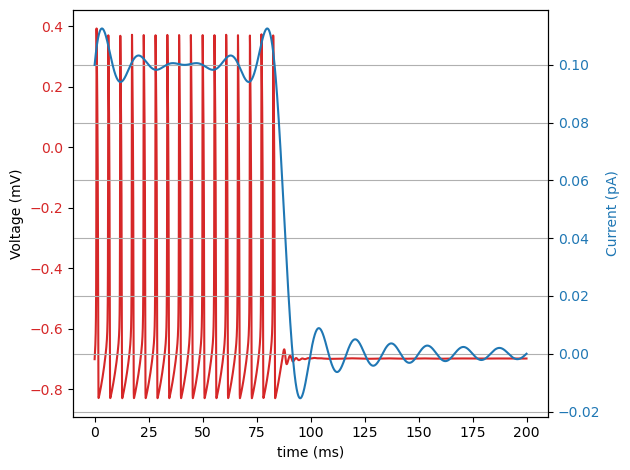

In [525]:
# TO DO: plot the results

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (ms)')
ax1.set_ylabel('Voltage (mV)')
ax1.plot(t_2, V, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Current (pA)', color=color)
ax2.plot(t_2, I, color=color)
ax2.tick_params(axis='y', labelcolor = color)

fig.tight_layout()
plt.grid(axis='y')
plt.show

In [526]:
# Determine the range where the neuron robustly fires
# TO DO: perform the experiment by first defining the range of amplitudes
ak_low = 0.0457
ak_high = 1.6489674109
delta_a = ak_high - ak_low
num_a = delta_a / 20

Ik = [I_in(l, ak, k, omega) for l in t_2]

a_k = np.arange(ak_low, ak_high, num_a)

count = np.zeros(len(a_k))
sp_rate = np.zeros(len(a_k))
amp = np.zeros(len(a_k))
for i in range(len(a_k)):
    Ik = [I_in(l, a_k[i], k, omega) for l in t_2]
    Vk, Rk = wilson(t_2, Ik)
    sp = spike_detect(Vk, 0.2485)
    
    count[i] = np.sum(sp)
    sp_rate[i] = count[i] / 200 * 1000
    
    sp_loc = np.where(sp)
    sp_loc_arr = sp_loc[0]
    ave = 0
    for j in range(len(sp_loc_arr)):
        ave += Vk[sp_loc_arr[j]]
    
    j = 0
    amp[i] = ave / len(sp_loc_arr)
    


Text(0.5, 1.0, 'Spike Amplitude Chart')

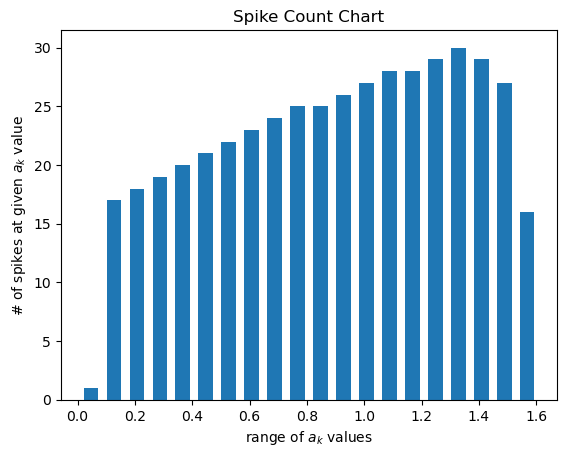

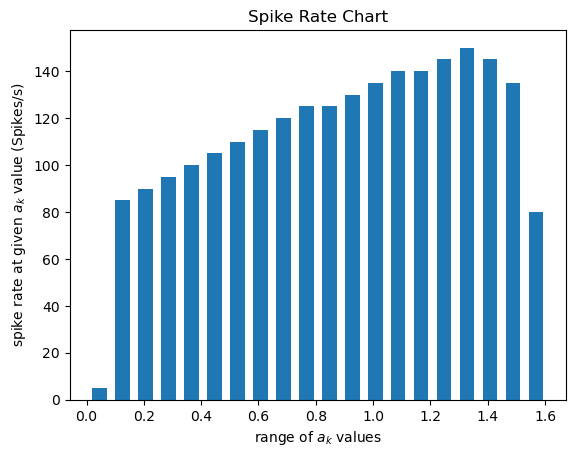

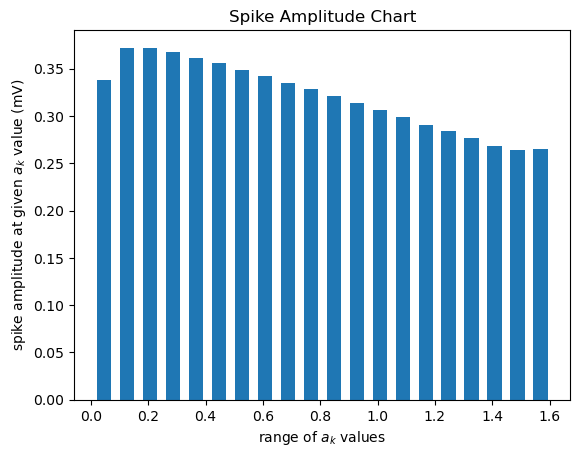

In [532]:
# TO DO: plot the results
plt.figure(1)
plt.bar(a_k, count, width = 0.05)
plt.xlabel("range of $a_k$ values")
plt.ylabel("# of spikes at given $a_k$ value")
plt.title("Spike Count Chart")

plt.figure(2)
plt.bar(a_k, sp_rate, width = 0.05)
plt.xlabel("range of $a_k$ values")
plt.ylabel("spike rate at given $a_k$ value (Spikes/s)")
plt.title("Spike Rate Chart")

plt.figure(3)
plt.bar(a_k, amp, width = 0.05)
plt.xlabel("range of $a_k$ values")
plt.ylabel("spike amplitude at given $a_k$ value (mV)")
plt.title("Spike Amplitude Chart")

Text(0.5, 1.0, 'Voltage vs. R plane for C over the range')

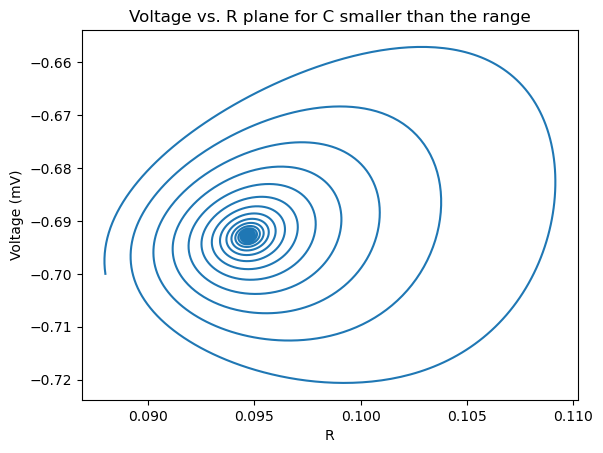

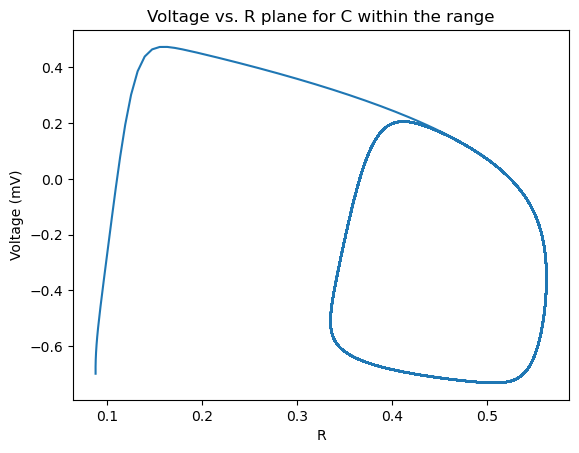

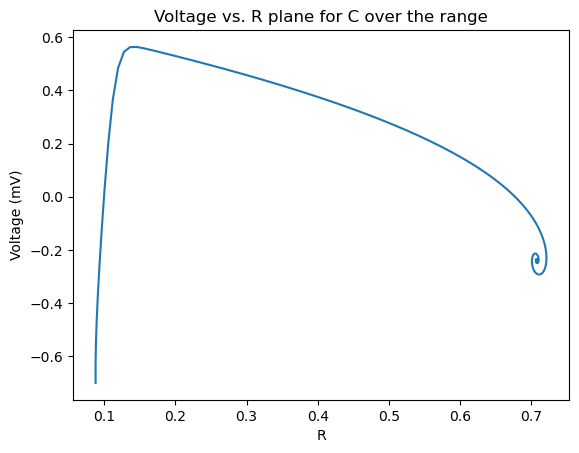

In [528]:
# For Heaviside step function current input, determine range of c to make the model periodically spike
# We recomment picking three values to show where the neuron
# 1. c smaller than the range
# 2. c within the range
# 3. c over the range
# TO DO: for each case above, plot limit cycle (V vs R) and the membrane voltage vs time

#u_t = 1
#I_t = c * u_t
c_lower = 0.063806199000000001
c_upper = 4


c1 = 0.04
c2 = 2
c3 = 6

I1 = [c1 * 1] * len(t_2)
I2 = [c2 * 1] * len(t_2)
I3 = [c3 * 1] * len(t_2)

V1, R1 = wilson(t_2, I1)
V2, R2 = wilson(t_2, I2)
V3, R3 = wilson(t_2, I3)

#fig, ax = plt.subplots(3)

#ax[0].plot(R1, V1)
#ax[1].plot(R2, V2)
#ax[2].plot(R3, V3)

plt.figure(1)
plt.plot(R1, V1)
plt.xlabel("R")
plt.ylabel("Voltage (mV)")
plt.title("Voltage vs. R plane for C smaller than the range")

plt.figure(2)
plt.plot(R2, V2)
plt.xlabel("R")
plt.ylabel("Voltage (mV)")
plt.title("Voltage vs. R plane for C within the range")

plt.figure(3)
plt.plot(R3, V3)
plt.xlabel("R")
plt.ylabel("Voltage (mV)")
plt.title("Voltage vs. R plane for C over the range")

#### TO DO: (double click to edit)
Comment (in markdown) on the effect of c on the limit cycle and membrane voltage that you observe. 

For C's that are outside of the range, the signal will have a spike, but then oscilates and enters an equilibirium. However, for C's that are over the range, the voltage settles almost immediately. For the C's that are too small, the voltage takes several cycles to settle. Only C's within the range can produce a limit cycle. 

### Part 2: Analyzing the Internal State of the Reduced Hodgkin-Huxley Model

As done in Chapter 3 for the Na and K channels of a Hodgkin-Huxley neuron, in this part, we model the variable `R` of the Reduced Hodgkin-Huxley neuron as a memconductance. 
1. Write down Ohm's law for $I_{R}$ and the differential equation for $I_R$, treating the current $I_R$ as input. 
2. Assuming (a) ramp and (b) spike train input currents, plot the voltage $V_R=V-E_R$ versus current $I_R$. Is $V_R$ a function of the current $I_R$?
3. Is the flux $\phi_R (t) = \int_0^t V_R(s) ds$ a function of the charge $q_R (t) = \int_0^t I_R (s) ds$?

#### Q1: (double click to edit)
TO DO: Your answer here.
(You can look up markdown syntax for equations online or simply follow the previous question prompts)

For the Reduced Hodgkin-Huxley Neuron: 
\begin{equation}
\begin{split}
C\frac{dV}{dt} &= -g_{Na}\cdot(17.81+47.71V+32.63V^2)\cdot(V-E_{Na}) - g_R\cdot R\cdot(V-E_R) + I(t) \\
\tau_R\frac{dR}{dt} &= -R + 1.35V + 1.03 \\
\end{split}
\end{equation}

Ohm's Law for $I_{R}$:
\begin{equation}
I_{R}=-g_{R}R(V-E_{R})
\end{equation}

\begin{equation}
I(t) = C\frac{dV}{dt} + g_{R}R(V-E_{R})
\end{equation}

In [ ]:
#Constants
C = 0.8 #muF / cm^2
g_R = 26 #mS/cm^2
E_R = -0.92 #mV

Ohm's Law where $V_R=V-E_R$:
\begin{equation}
I(t) = C\frac{dV}{dt}+g_{R}RV_{R}
\end{equation}
\begin{equation}
I_R = -g_{R}RV_{R}
\end{equation}

Text(0.5, 1.0, 'Voltage vs. Current Graph')

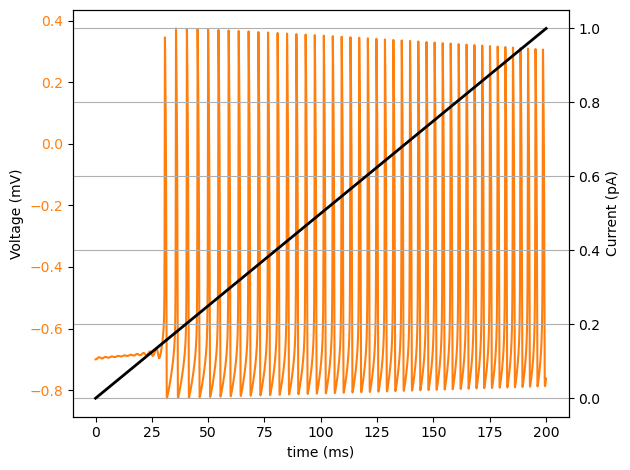

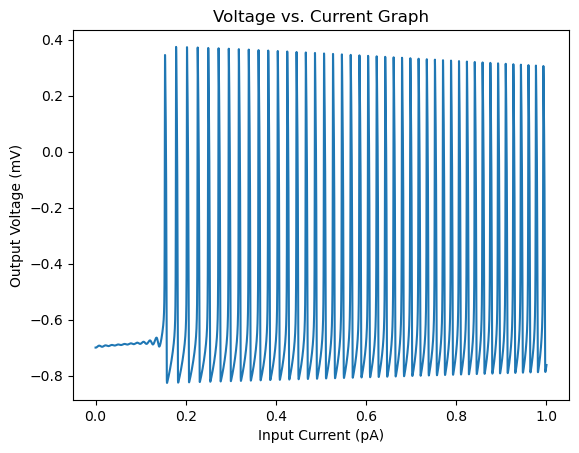

In [529]:
# Q2: Ramp current input
#TO DO: 

#plot: current as input, voltage as output 
#plot: current vs time, voltage vs time, current vs voltage
from scipy import signal
#V-E_R = V_R

ramp = -np.abs(signal.sawtooth(5*np.pi*delta_t*t_2)) + 1

ramp1 = np.linspace(0, 1, num=len(t_2))
a = 0.1

V_ramp, R_ramp = wilson(t_2, ramp1)

fig, ax1 = plt.subplots(1)
color = 'tab:orange'
ax1.set_xlabel('time (ms)')
ax1.set_ylabel('Voltage (mV)')
ax1.plot(t_2, V_ramp, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'k'
ax2.set_ylabel('Current (pA)', color=color)
ax2.plot(t_2, ramp1, color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.grid(axis='y')
plt.show


plt.figure(2)
plt.plot(ramp1, V_ramp)
plt.xlabel("Input Current (pA)")
plt.ylabel("Output Voltage (mV)")
plt.title("Voltage vs. Current Graph")

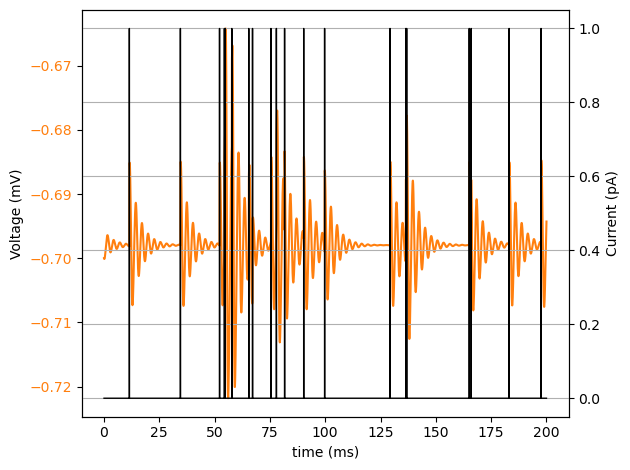

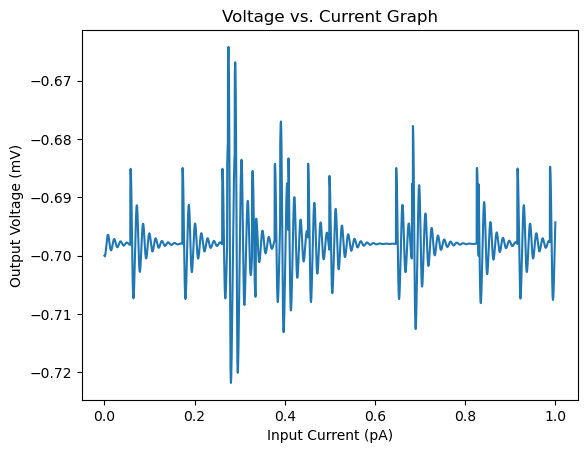

In [590]:
# Q2: Spike train current input
# TO DO: generate spike train with poison process

spike_rate = 0.00125   

sp_tr = np.random.poisson(spike_rate, len(t_2))  # Convert spike rate to spikes per ms


signal = np.zeros_like(t_2)
signal[sp_tr > 0] = 1

V_spike, R_spike = wilson(t_2, signal)


fig, ax1 = plt.subplots(1)
color = 'tab:orange'
ax1.set_xlabel('time (ms)')
ax1.set_ylabel('Voltage (mV)')
ax1.plot(t_2, V_spike, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'k'
ax2.set_ylabel('Current (pA)', color=color)
ax2.plot(t_2, signal, color=color, linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.grid(axis='y')
plt.show


plt.figure(2)
plt.plot(ramp1, V_spike)
plt.xlabel("Input Current (pA)")
plt.ylabel("Output Voltage (mV)")
plt.title("Voltage vs. Current Graph")
plt.show()


#### Q2: (double click to edit)
TO DO: observation on $V_R$ and $I_R$

Mathematically, $V_R$ is a direct function to $I_R$

#### Q3: (double click to edit)
TO DO: your answer here